In [87]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [88]:
def pearson(X,Y):
    n = len(X)
    r = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/math.sqrt((n*np.sum(X**2) - np.sum(X)**2)*(n*np.sum(Y**2) - np.sum(Y)**2))
    return r

In [96]:
def regressao(X,Y):
    n = len(X)
    a = (n*np.sum(X*Y) - (np.sum(X)*np.sum(Y)))/(n*np.sum(X**2) - np.sum(X)**2)
    b = (np.sum(Y) - a *np.sum(X))/n
    print("%f * X + %f"%(a,b))
    return (lambda z: a*z+b)

In [97]:
data = pd.read_csv("graduate-admissions/Admission_Predict.csv")

In [107]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [108]:
X = data["CGPA"]
Y = data["Chance of Admit "]
print("%d x %d"%(X.size, Y.size))

400 x 400


In [100]:
print("Coeficiente de Pearson: ",pearson(X,Y))

Coeficiente de Pearson:  0.8732890993552895


In [101]:
reg = regressao(X,Y)
E = X.apply(reg)

0.208847 * X + -1.071512


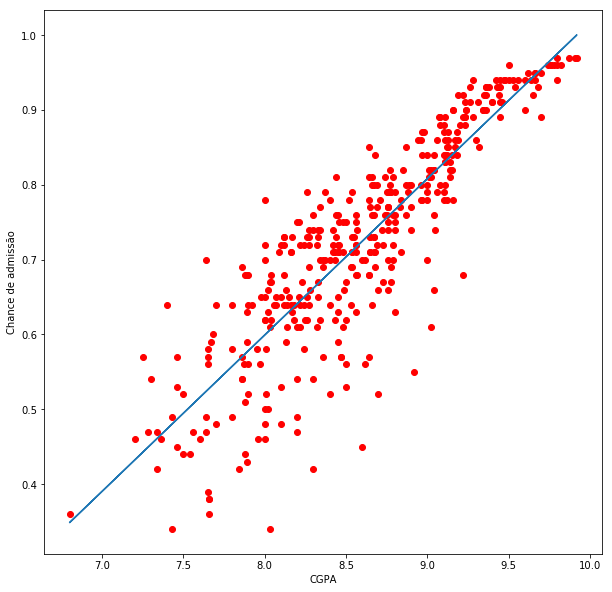

In [105]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.plot(X, Y, 'ro', label="Idade x Peso")
plt.xlabel("CGPA")
plt.ylabel("Chance de admissão")
ax.plot(X, E)
plt.show()